# Magnetic anomalies

**This notebook exemplifies the shape of magnetic anomalies at different geographic locations, such as the magnetic pole and the magnetic equator, for example. We will try to verify how is the anomaly behavior for each case, which all includes both induced and remanent magnetization.**

**In all cases, we will use a vertical dike model and a solid sphere to compute the total field anomaly.**

In [1]:
# Importing all usefull libraries
import numpy
from matplotlib import pyplot
from codes.prism import prism_tf
from codes.sphere import sphere_tfa
from codes.statistical import analysis
from codes.auxiliars import addnoise
from codes.grids import regular_grid

In [2]:
# Positions and number of points
n = 60
shape = (n, n)
# Computes the mesh of all points
x, y, z = regular_grid((-2500., 2500., -2500., 2000.), shape, -200.)

In [3]:
# Setting the parameters for prism
prism_model = [-350., 200., -100., 480., 200., 700., 1.0275] # meters + A/m2
spheremodel = [-50., 50., 560., 380., 1.285]

In [4]:
# Field at Pole (90., 0.)
# Source at (45., -39.)
tfp_1 = prism_tf(x, y, z, prism_model, 90., 0., 45., -39.)
tfs_1 = sphere_tfa(x, y, z, spheremodel, 90., 0., 45., -39.)

In [5]:
# Field at Equator (45., 0.)
# Source at (45., 0.)
tfp_2 = prism_tf(x, y, z, prism_model, 45., 0., 45., 0.)
tfs_2 = sphere_tfa(x, y, z, spheremodel, 45., 0., 45., 0.)

In [6]:
# Field at Equator (45., 0.)
# Source with reverse remanent magnetization (-45., -45.)
tfp_3 = prism_tf(x, y, z, prism_model, 45., 45., -45., -45.)
tfs_3 = sphere_tfa(x, y, z, spheremodel, 45., 45., -45., -45.)

In [7]:
# Field at (59., -33.)
# Source with induced magnetization
tfp_4 = prism_tf(x, y, z, prism_model, 59., -33., 59., -33.)
tfs_4 = sphere_tfa(x, y, z, spheremodel, 59., -33., 59., -33.)

In [8]:
# Field at (59., 33.)
# Source with reverse magnetization
tfp_5 = prism_tf(x, y, z, prism_model, 59., -33., -59., 50.)
tfs_5 = sphere_tfa(x, y, z, spheremodel, 59., -33., -59., 50.)

In [9]:
# Field at (-59., 33.)
# Source with induced magnetization
tfp_6 = prism_tf(x, y, z, prism_model, -59., 33., -59., 33.)
tfs_6 = sphere_tfa(x, y, z, spheremodel, -59., 33., -59., 33.)

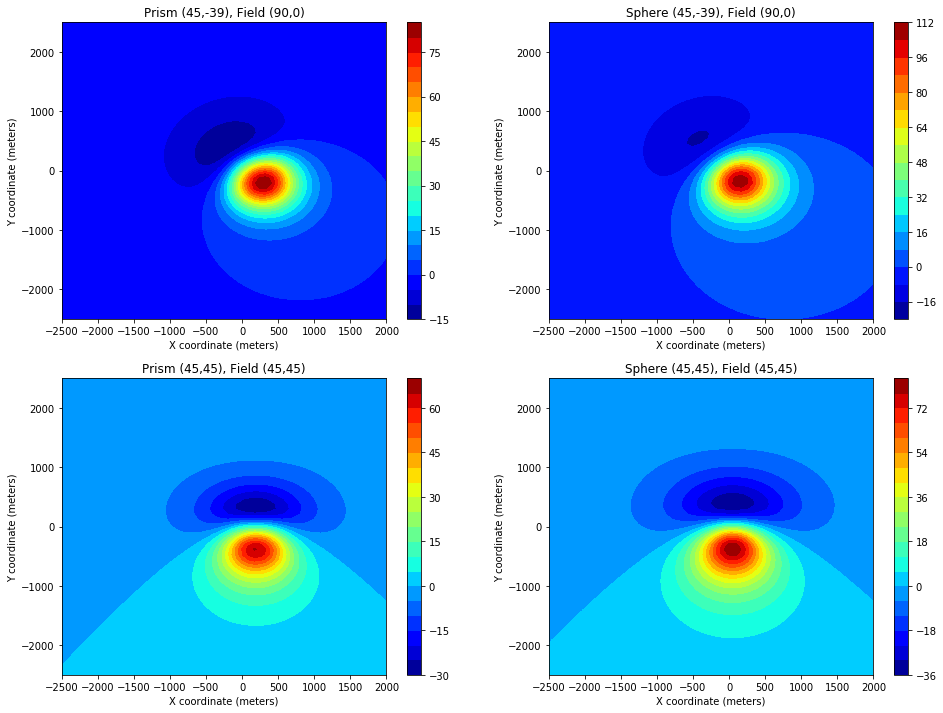

In [10]:
# Plotting the results (Part 1)
pyplot.figure(figsize=(16, 12))

pyplot.subplot(2,2,1)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfp_1.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Prism (45,-39), Field (90,0)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,2)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfs_1.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Sphere (45,-39), Field (90,0)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,3)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfp_2.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Prism (45,45), Field (45,45)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,4)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfs_2.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Sphere (45,45), Field (45,45)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.show()

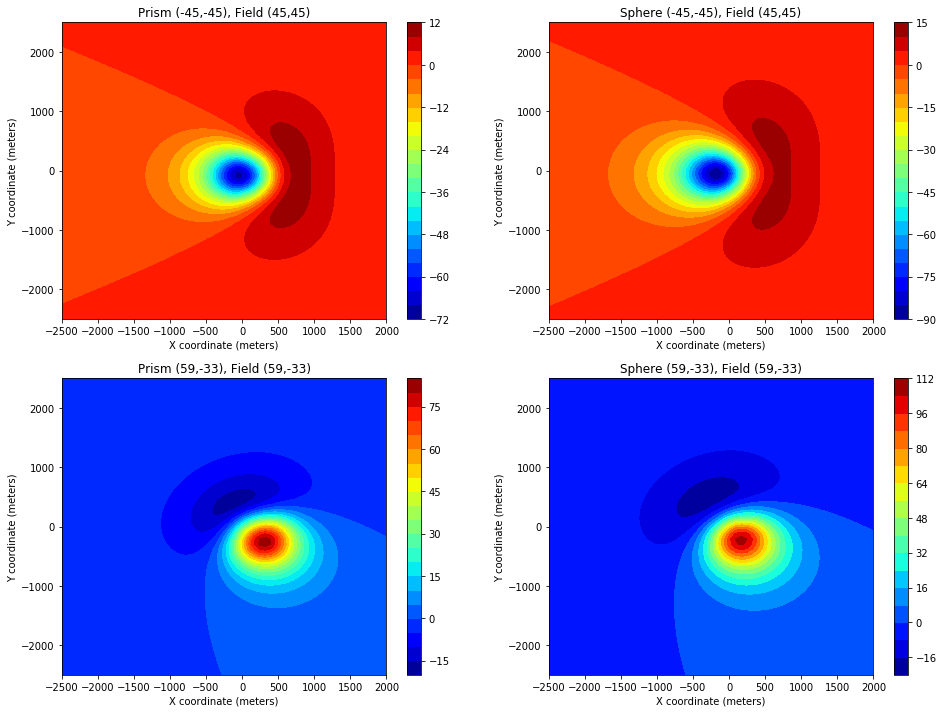

In [11]:
# Plotting the results (Part 2)
pyplot.figure(figsize=(16, 12))

pyplot.subplot(2,2,1)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfp_3.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Prism (-45,-45), Field (45,45)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,2)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfs_3.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Sphere (-45,-45), Field (45,45)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,3)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfp_4.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Prism (59,-33), Field (59,-33)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,4)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfs_4.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Sphere (59,-33), Field (59,-33)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.show()

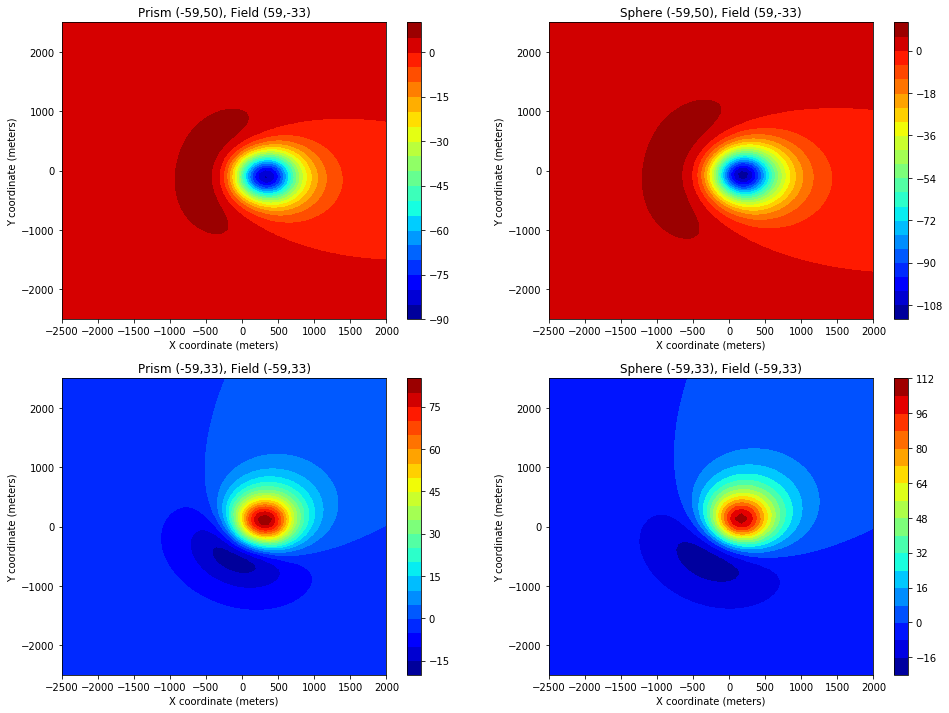

In [12]:
# Plotting the results (Part 3)
pyplot.figure(figsize=(16, 12))

pyplot.subplot(2,2,1)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfp_5.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Prism (-59,50), Field (59,-33)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,2)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfs_5.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Sphere (-59,50), Field (59,-33)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,3)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfp_6.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Prism (-59,33), Field (-59,33)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.subplot(2,2,4)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfs_6.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Sphere (-59,33), Field (-59,33)')
pyplot.xlabel('X coordinate (meters)')
pyplot.ylabel('Y coordinate (meters)')
pyplot.colorbar()

pyplot.show()

In [24]:
inc = numpy.arange(-90., 91.)
dec = numpy.arange(-180., 181., 10)

In [31]:
D, I = numpy.meshgrid(dec, inc)

In [32]:
# Maximun and minimum values
tfp_max = numpy.zeros_like(I)
tfp_min = numpy.zeros_like(I)
tfs_max = numpy.zeros_like(I)
tfs_min = numpy.zeros_like(I)

In [33]:
from time import time

In [34]:
ii = time()
for i in range(inc.size):
    for d in range(dec.size):
        tf_prism = prism_tf(x, y, z, prism_model, 23., 33., inc[i], dec[d])
        tfp_max[i,d] = tf_prism.max()
        tfp_min[i,d] = tf_prism.min()
        #tfp_med.append(tf_prism.mean())-55., 29.
ff = time()
print 'Time of computation (seconds):', ff - ii

Time of computation (seconds): 40.0277900696


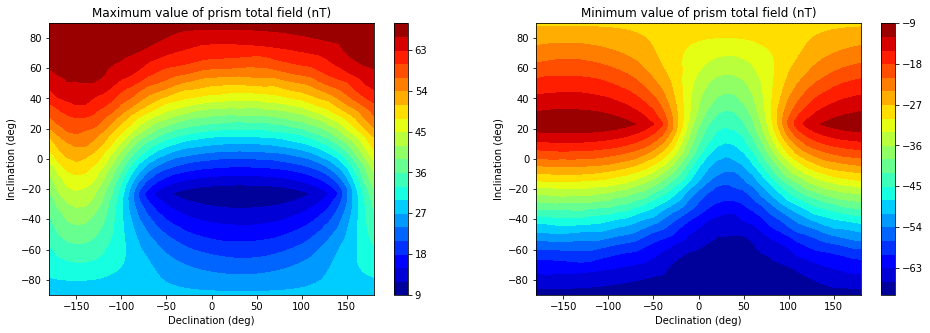

In [35]:
pyplot.figure(figsize=(16, 5))

pyplot.subplot(1,2,1)
pyplot.contourf(D, I, tfp_max, 20, cmap = pyplot.cm.jet)
pyplot.title('Maximum value of prism total field (nT)')
pyplot.xlabel('Declination (deg)')
pyplot.ylabel('Inclination (deg)')
pyplot.colorbar()

pyplot.subplot(1,2,2)
pyplot.contourf(D, I, tfp_min, 20, cmap = pyplot.cm.jet)
pyplot.title('Minimum value of prism total field (nT)')
pyplot.xlabel('Declination (deg)')
pyplot.ylabel('Inclination (deg)')
pyplot.colorbar()

pyplot.show()

In [36]:
ii = time()
for i in range(inc.size):
    for d in range(dec.size):
        tf_sphere = sphere_tfa(x, y, z, spheremodel, 23., 33., inc[i], dec[d])
        tfs_max[i,d] = tf_sphere.max()
        tfs_min[i,d] = tf_sphere.min()
        #tfp_med.append(tf_prism.mean())
ff = time()
print 'Time of computation (seconds):', ff - ii

Time of computation (seconds): 5.5738568306


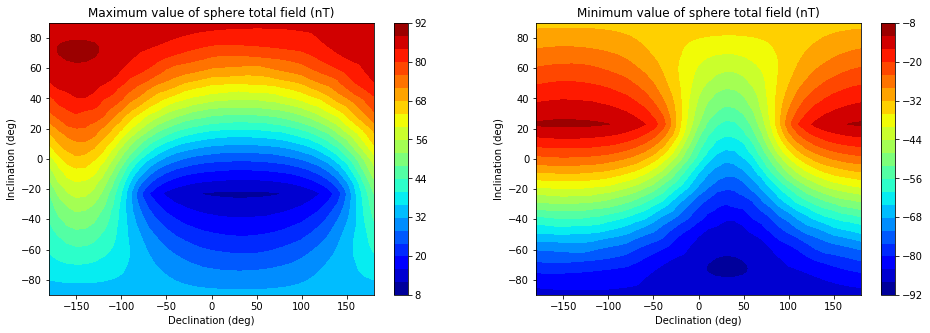

In [37]:
pyplot.figure(figsize=(16, 5))

pyplot.subplot(1,2,1)
pyplot.contourf(D, I, tfs_max, 20, cmap = pyplot.cm.jet)
pyplot.title('Maximum value of sphere total field (nT)')
pyplot.xlabel('Declination (deg)')
pyplot.ylabel('Inclination (deg)')
pyplot.colorbar()

pyplot.subplot(1,2,2)
pyplot.contourf(D, I, tfs_min, 20, cmap = pyplot.cm.jet)
pyplot.title('Minimum value of sphere total field (nT)')
pyplot.xlabel('Declination (deg)')
pyplot.ylabel('Inclination (deg)')
pyplot.colorbar()

pyplot.show()